## Final Project

In [1]:
#packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#fish count numbers

#fishcount.csv contains total annual run for many species
#parse data for applicable species
salmonData = np.genfromtxt('fishcount.csv', delimiter = ',', skip_header = 1, skip_footer = 2, usecols=range(1,11)) 
yearSalmonData = salmonData[:,0]
chinook = salmonData[:,1]
coho = salmonData[:,3]
steelhead = salmonData[:,5]


In [2]:
#for normalizing data 
from sklearn.preprocessing import minmax_scale

#temperature data

#temperature data is within monthly file (txt)
#format for this data is year month temp
temperatureData = np.genfromtxt('monthly', delimiter = '\t', skip_header = 45,usecols = range(4,7))
yearTempData = temperatureData[:,0]
month = temperatureData[:,1]
temperature = temperatureData[:,2]

#list for storing annual averages that will be calculated
averageTemperatureList = []

#want monthly temperature data for months april-august, then average them for an annual value
#most fish run during this time and data was incomplete over the rest of the year 
x = 0
sum = 0
count = 0
while yearTempData[x + 1] < 2018:   #dont have fish count numbers past 2017
    while (yearTempData[(x + 1)] == yearTempData[x]): #seperate yearly data        
        if (month[(x)] >= 4 and month[(x)]<=8):
            sum += temperature[x]    #sum temperatures for months of interest 
            count += 1               #keep track of how many values recorded
            x += 1 
            continue
        elif(month[(x)] <= 3 or month[(x)] >= 9):   
            x += 1
    averageTemperatureList.append(round(sum/count, 3)) #store the average temperatures for each year 
    sum = 0   #reset necessary variable for next iteration of outside loop
    count = 0
    x += 1
   
def normalizeListNumpy(listNumpy):   #function that normalizes data for direct comparison (0 to 1 scale)
    normalizedList = minmax_scale(listNumpy)
    return normalizedList  

#normalize lists for comparison
chinookNormal = normalizeListNumpy(chinook)
tempNormal = normalizeListNumpy(averageTemperatureList)
cohoNormal = normalizeListNumpy(coho)
steelheadNormal = normalizeListNumpy(steelhead)
  

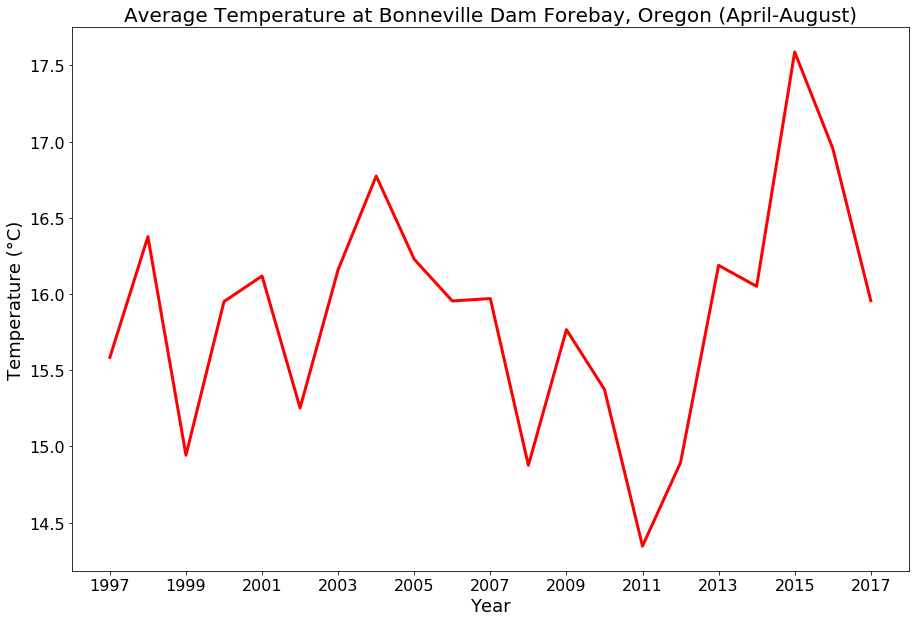

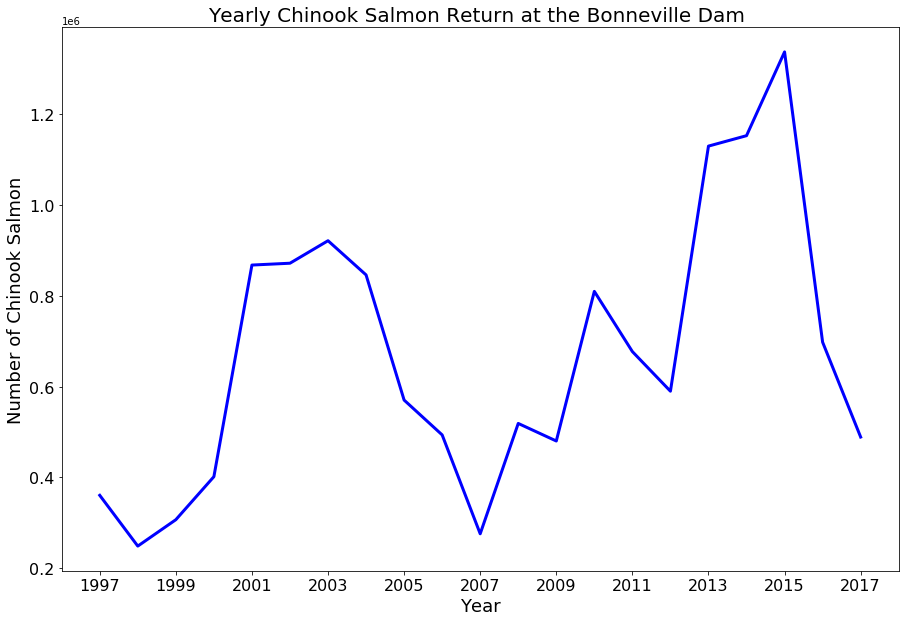

In [3]:
#plotting 

#temp vs. year
plt.figure(figsize = (15, 10))
plt.plot(yearSalmonData, averageTemperatureList, "r", linewidth = 3)  
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Temperature (\N{DEGREE SIGN}C)", fontsize = 18)
plt.title("Average Temperature at Bonneville Dam Forebay, Oregon (April-August)", fontsize = 20)
plt.xticks(np.arange(1997, 2019, 2))
plt.tick_params(labelsize = 16)

#chinook salmon count vs. year 
plt.figure(figsize = (15, 10))
plt.plot(yearSalmonData, chinook, 'b',linewidth = 3)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of Chinook Salmon", fontsize = 18)
plt.title("Yearly Chinook Salmon Return at the Bonneville Dam ", fontsize = 20)
plt.xticks(np.arange(1997, 2019, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1e5,1.3e6))
plt.tick_params(labelsize = 16)
plt.rc('font', size=16)

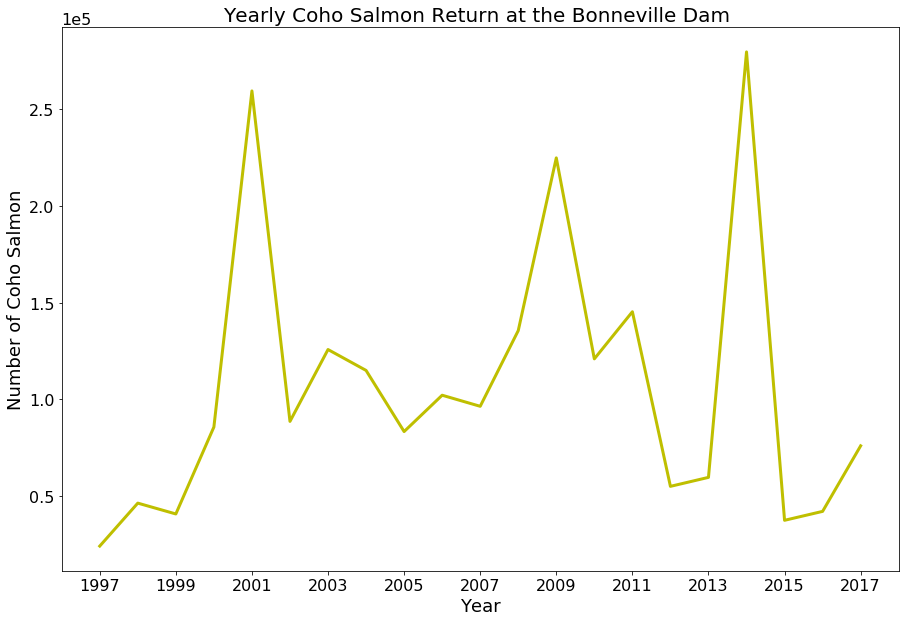

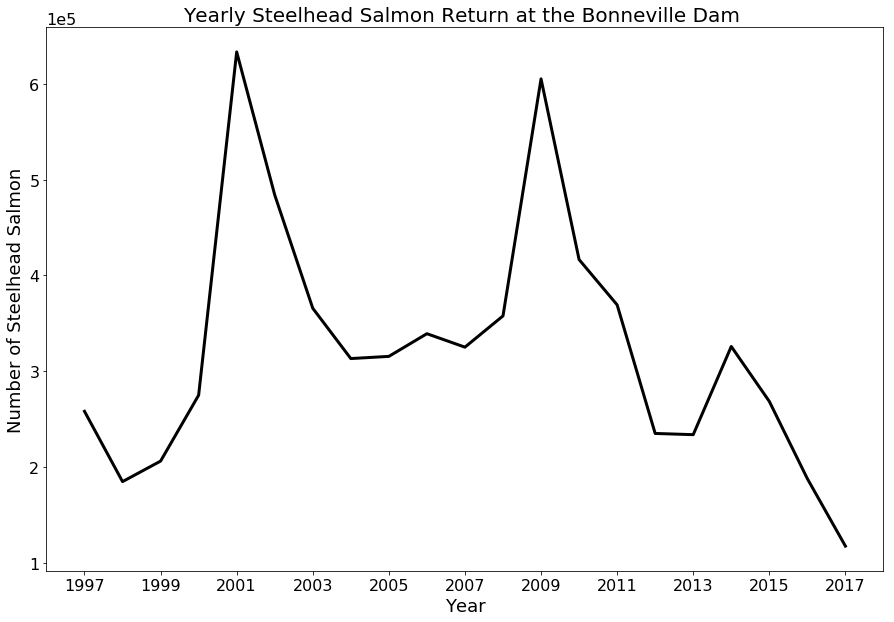

In [4]:
#number of coho vs. temperature
plt.figure(figsize = (15, 10))
plt.plot(yearSalmonData, coho, 'y', linewidth = 3)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of Coho Salmon", fontsize = 18)
plt.title("Yearly Coho Salmon Return at the Bonneville Dam ", fontsize = 20)
plt.xticks(np.arange(1997, 2019, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(2e4,3e5))
plt.tick_params(labelsize = 16)
plt.rc('font', size=16)

#number of steelhead vs. temperature
plt.figure(figsize = (15, 10))
plt.plot(yearSalmonData, steelhead, 'k', linewidth = 3)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of Steelhead Salmon", fontsize = 18)
plt.title("Yearly Steelhead Salmon Return at the Bonneville Dam ", fontsize = 20)
plt.xticks(np.arange(1997, 2019, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1e5,7e5))
plt.tick_params(labelsize = 16)
plt.rc('font', size=16)

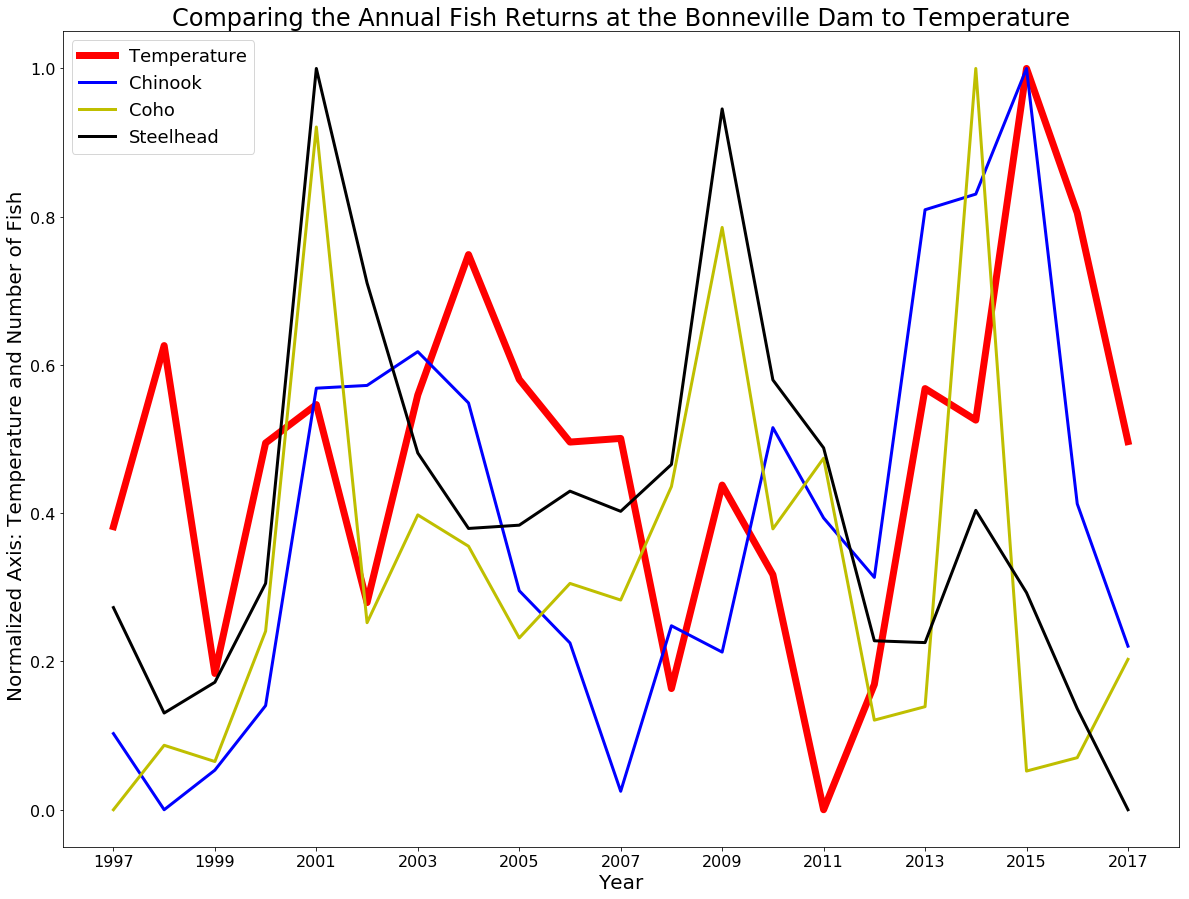

In [5]:
#compare all species: number of fish vs temperature normalized
plt.figure(figsize = (20, 15))
plt.plot(yearSalmonData, tempNormal,'r', linewidth = 7, label = 'Temperature')
plt.plot(yearSalmonData, chinookNormal,'b', linewidth = 3, label = 'Chinook')        
plt.plot(yearSalmonData, cohoNormal,'y', linewidth = 3, label = 'Coho')
plt.plot(yearSalmonData, steelheadNormal,'k', linewidth = 3, label = 'Steelhead')
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Normalized Axis: Temperature and Number of Fish  ", fontsize = 20)
plt.title("Comparing the Annual Fish Returns at the Bonneville Dam to Temperature", fontsize = 24)
plt.xticks(np.arange(1997, 2019, 2))
plt.legend(loc = 'upper left', fontsize = 18)
plt.tick_params(labelsize = 16)


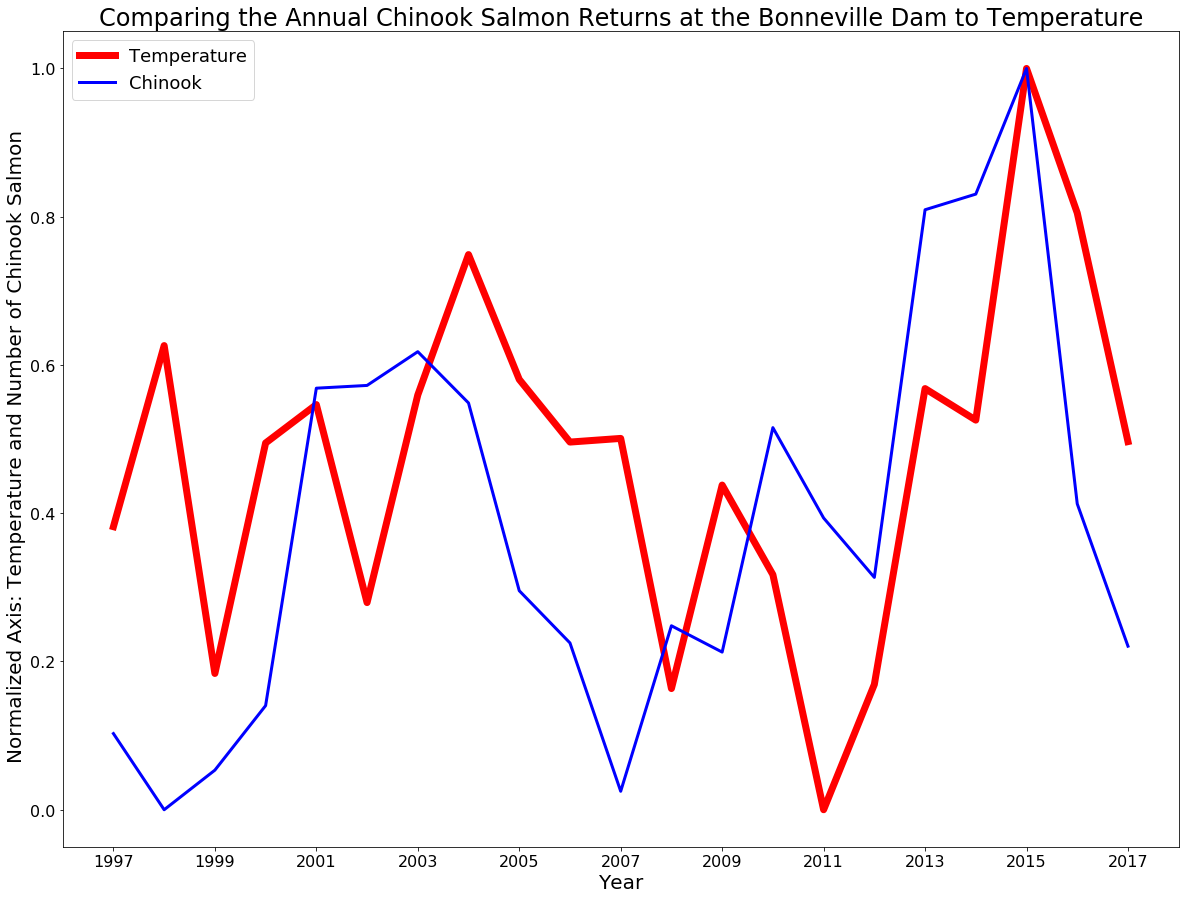

In [6]:
#look at just one species for clarity: chinook salmon vs. temperature (normalized) 
plt.figure(figsize = (20, 15))
plt.plot(yearSalmonData, tempNormal,'r', linewidth = 7, label = 'Temperature')
plt.plot(yearSalmonData, chinookNormal,'b', linewidth = 3, label = 'Chinook')        
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Normalized Axis: Temperature and Number of Chinook Salmon  ", fontsize = 20)
plt.title("Comparing the Annual Chinook Salmon Returns at the Bonneville Dam to Temperature", fontsize = 24)
plt.xticks(np.arange(1997, 2019, 2))
plt.legend(loc = 'upper left', fontsize = 18)
plt.tick_params(labelsize = 16)